In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set plotting options
plt.rcParams.update({'font.size':12})

### True function
### $h(x)= \sin(x) + \frac{x}{4} \hspace{0.22cm} ; \hspace{0.63cm} x\in [-5, 5]$


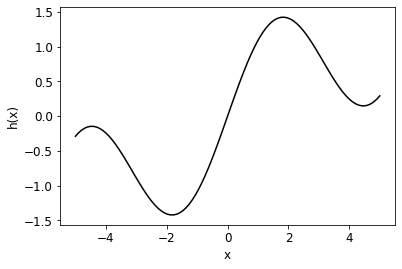

In [2]:
def h(x):
    return (np.sin(x) + 0.25*x).flatten()

#plot it
plt.plot(np.linspace(-5,5,100), h(np.linspace(-5,5,100)), c='k')
plt.xlabel("x")
plt.ylabel("h(x)")
plt.show()

### Kernel definition
##  $ k\left( x,x^{\prime} \right) =\sigma^{2} \text{exp} \left( -\frac{\| x-x^{\prime}\|^{2}}{2l^{2}} \right)$

 where 
 * $\sigma^2$ is the variance ($\sigma$ also known as amplitude)
 * $l$ is the lengthscale

In [3]:
def covariance_function(X1, X2, l= 1.0, sigma_f= 1.0):
    '''
    computes a covariance matrix from points in X1 and X2
    
    X1: Array of m points (m x d)
    X2: Array of n points (n x d)
    return: covariance matrix (m x n)
    '''
    sqdist= np.sum(X1**2, 1).reshape(-1,1) + np.sum(X2**2, 1) - 2*np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)


### Simulate GPR for different scenarios

In [4]:
def simulate_GP(n, l):
    '''
    n: number of data points
    l: length scale for kernel
    '''
    np.random.seed(3)
    n_observed= n
    n_predict= 100
    s_2= 5e-04   # measurement noise
    
    Xtrain = np.random.uniform(-5, 5, size=(n_observed,1))
    ytrain = h(Xtrain) + s_2*np.random.randn(n_observed)
    
    # get predicted points uniformly spaced in the domain
    Xpredict = np.linspace(-5,5, n_predict).reshape(-1,1)
    
    # define covariance matrices
    K    = covariance_function(Xtrain, Xtrain, l)
    K_s  = covariance_function(Xtrain, Xpredict, l)
    K_ss = covariance_function(Xpredict, Xpredict, l)
    
    # get predicted mean and stde
    mu = K_s.T.dot(np.linalg.inv(K + s_2*np.eye(n_observed)).dot(ytrain))
    var = np.diag(K_ss - K_s.T.dot(np.linalg.inv(K + s_2*np.eye(n_observed)).dot(K_s)))
    std = np.sqrt(var)
    
    # random samples of prior and posterior
    L1 = np.linalg.cholesky(K + s_2*np.eye(n_observed))
    L2 = np.linalg.solve(L1, K_s)
    L3 = np.linalg.cholesky(K_ss + 1e-6*np.eye(n_predict))
    L4 = np.linalg.cholesky(K_ss + 1e-6*np.eye(n_predict) - np.dot(L2.T, L2))
    samples = np.random.normal(size= (n_predict, 10))
    prior_samples = np.dot(L3, samples)
    posterior_samples = mu.reshape(-1,1) + np.dot(L4, samples)
    
    #plot stuff
    fig, axarr = plt.subplots(1,3,figsize=(16,4))
    axarr[0].plot(Xpredict, prior_samples)
    axarr[0].axis([-5, 5, -3, 3])
    axarr[0].set_title("prior")
    axarr[0].set_xlabel("x")
    axarr[0].set_ylabel("h(x)")
    
    axarr[1].plot(Xpredict, posterior_samples)
    axarr[1].plot(Xtrain, ytrain, 'ro', ms=10)
    axarr[1].axis([-5, 5, -3, 3])
    axarr[1].set_title("posterior")
    axarr[1].set_xlabel("x")
    axarr[1].set_ylabel("h(x)")
    
    axarr[2].fill_between(Xpredict.flat, mu-std, mu+std, color="lightsteelblue")
    axarr[2].plot(Xpredict, mu, 'r--', lw=2)
    axarr[2].plot(Xtrain, ytrain, 'ro', ms=10)
    axarr[2].set_title("posterior mean and stdev")
    axarr[2].axis([-5, 5, -3, 3])
    axarr[2].set_xlabel("x")
    axarr[2].set_ylabel("h(x)")
    
    plt.show()



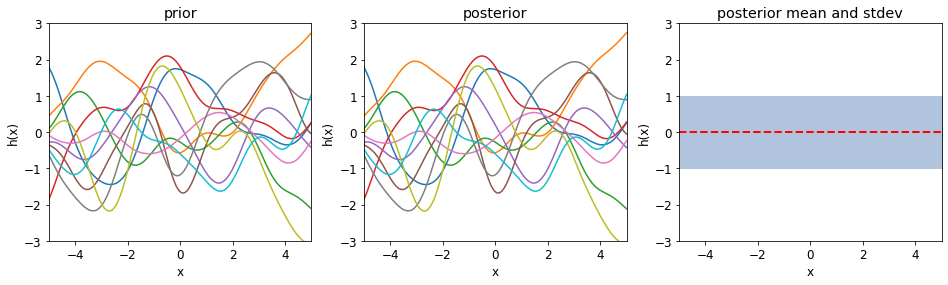

In [5]:
simulate_GP(n=0, l=1.0)

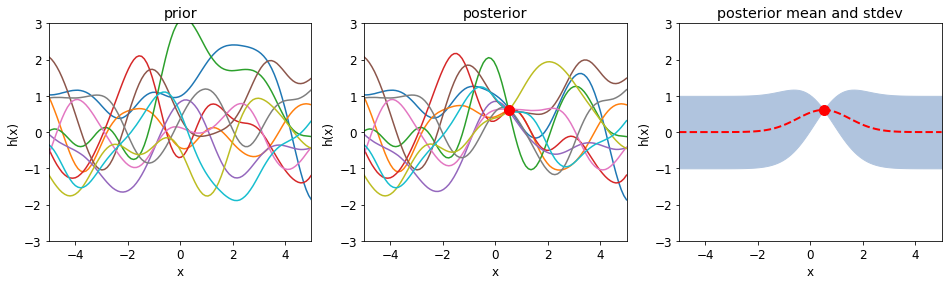

In [6]:
simulate_GP(n=1, l=1.0)

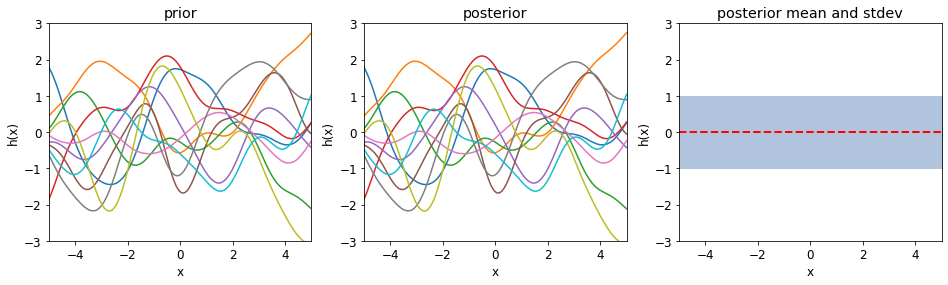

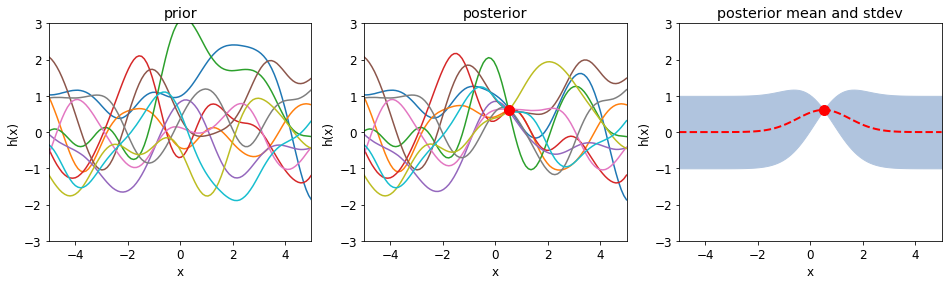

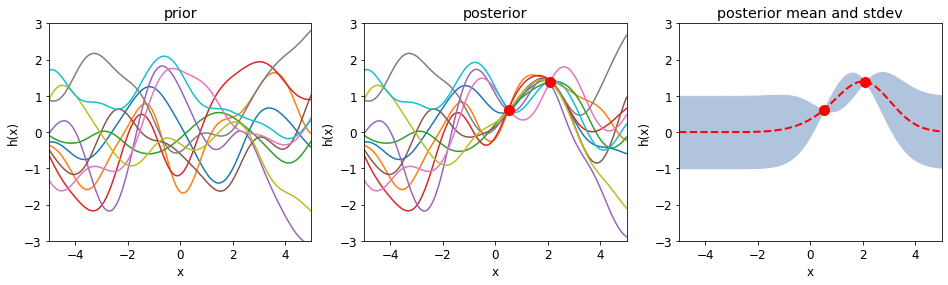

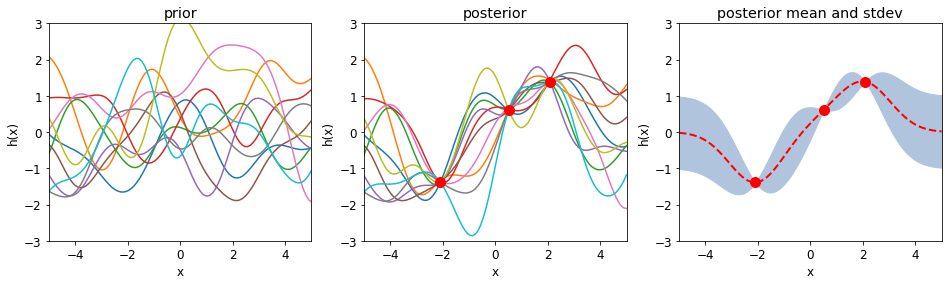

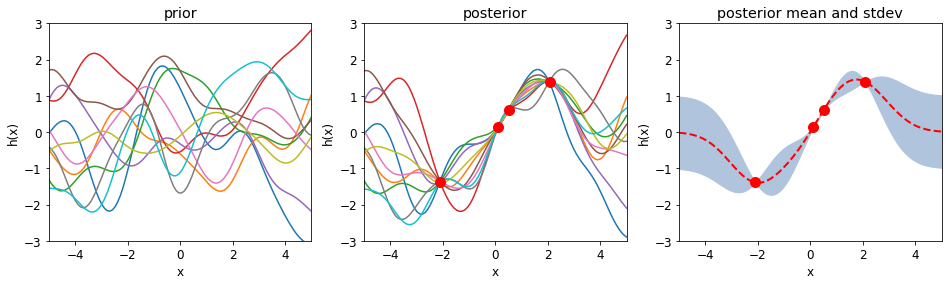

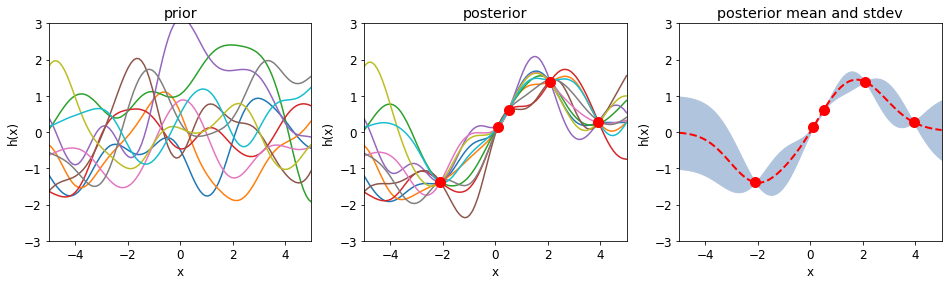

In [71]:
for i in range(6):
    simulate_GP(n=i, l=1.0)